# Read Data and Cleaning Data

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
 #Read data
df = pd.read_csv('games_sales.csv', sep=";", on_bad_lines='skip')
df.head(5)

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/01/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/01/2011,"Sandbox,Â survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,05/01/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/01/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,05/01/2011,Action-adventure,Re-Logic,Re-Logic


In [142]:
#Cleaned dataframe
df_cleaned = df.dropna()
df_cleaned.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox,Â survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
5,World of Warcraft,14.0,Warcraft,2004-11-01,MMORPG,Blizzard Entertainment,Blizzard Entertainment
6,Half-Life 2,12.0,Half-Life,2004-11-01,First-person shooter,Valve,ValveÂ (digital)
7,The Witcher 3: Wild Hunt,12.0,The Witcher,2015-05-01,Action role-playing,CD Projekt Red,CD Projekt


In [30]:
#Show name of columns
df.columns

Index(['Name', 'Sales', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher'],
      dtype='object')

In [31]:
#Change column data type
df['Release'] = pd.to_datetime(df['Release'])

In [32]:
#Show about each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       177 non-null    object        
 1   Sales      177 non-null    float64       
 2   Series     141 non-null    object        
 3   Release    177 non-null    datetime64[ns]
 4   Genre      177 non-null    object        
 5   Developer  177 non-null    object        
 6   Publisher  177 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 9.8+ KB


In [33]:
#Show 5 top value each column
for col_name in ['Series', 'Genre', 'Developer', 'Publisher']:
    print(df[col_name].value_counts().head(), '\n')

Series
StarCraft            6
Command & Conquer    5
Civilization         4
Age of Empires       4
Warcraft             3
Name: count, dtype: int64 

Genre
Real-time strategy                        26
First-person shooter                      19
Action role-playing                       12
Construction and management simulation     9
Role-playing game                          8
Name: count, dtype: int64 

Developer
Blizzard Entertainment        10
Maxis                          6
Paradox Development Studio     5
id Software                    4
Westwood Studios               4
Name: count, dtype: int64 

Publisher
Electronic Arts           19
Blizzard Entertainment    10
Paradox Interactive        7
Activision                 6
GT Interactive             5
Name: count, dtype: int64 



# EDA

In [52]:
#The oldest game on dataset
oldest_game = df.iloc[df['Release'].argmin()]
oldest_game

Name                                       Hydlide
Sales                                          1.0
Series                                     Hydlide
Release                        1984-12-01 00:00:00
Genre                          Action role-playing
Developer    Technology and Entertainment Software
Publisher    Technology and Entertainment Software
Name: 133, dtype: object

In [83]:
#The newest game on dataset
newest_game = df.loc[df['Release'].argmax()]
newest_game

Name                         Valheim
Sales                            6.0
Series                           NaN
Release          2021-02-01 00:00:00
Genre                       Survival
Developer                  Iron Gate
Publisher    Coffee Stain Publishing
Name: 20, dtype: object

In [150]:
#Publisher published most of the games
most_publisher = df['Publisher'].value_counts().nlargest(1)
most_publisher

Publisher
Electronic Arts    19
Name: count, dtype: int64

In [37]:
#Developer developed most of the games
most_developer = df['Developer'].value_counts().nlargest(1)
most_developer

Developer
Blizzard Entertainment    10
Name: count, dtype: int64

In [143]:
#Series has the most sales
most_sales = df_cleaned.iloc[df_alt['Sales'].value_counts().argmax()]
most_sales

Name                   Minecraft
Sales                       33.0
Series                 Minecraft
Release      2011-11-01 00:00:00
Genre         Sandbox,Â survival
Developer         Mojang Studios
Publisher         Mojang Studios
Name: 1, dtype: object

<Axes: xlabel='Series', ylabel='Sales'>

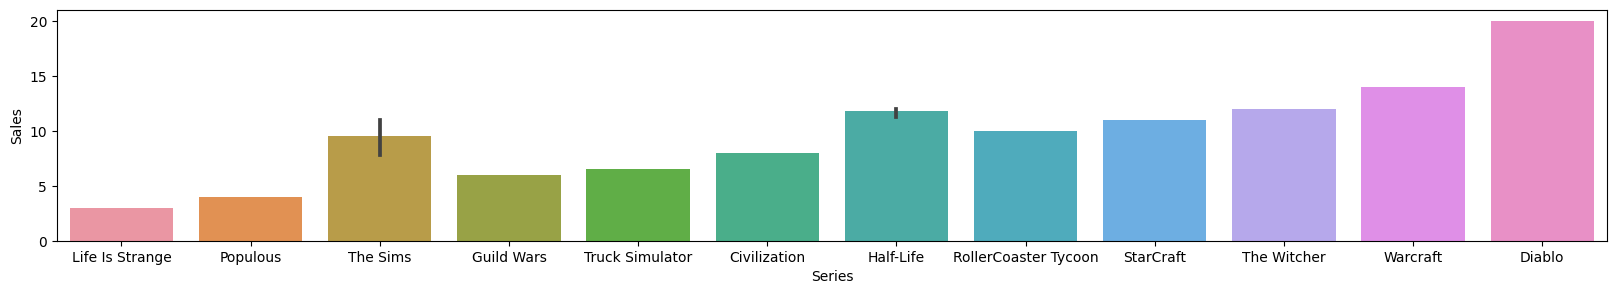

In [148]:
plt.rcParams["figure.figsize"] = (20,3)

sns.barplot(data = df_cleaned.iloc[df_cleaned['Sales']], x= 'Series', y= 'Sales')

In [ ]:
#Series have the most games
most_series = df['Series'].value_counts().nlargest(1)
most_series

Series
StarCraft    6
Name: count, dtype: int64